In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from scipy.stats import linregress
from IPython.display import display

from plot_funcs import get_results, get_inter_pipe_df, get_intra_pipeline_df
from funcs import save_stats_summary

In [4]:
results = get_results('../exp/results')
static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 87390 Incomplete: 0


### First compare un-thresholded versions of intra pipe

Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     4.029303e-01
Size                             2.337126e-123
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     568.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          4.64e-122
Time:                        10:06:50   Log-Likelihood:                 415.20
No. Observations:                 438   AIC:                            -824.4
Df Residuals:                     435   BIC:                            -812.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.4998      0.016    157.356      0.000       2.469       2.531
C(Pipeline)[T.Elastic-Net FS]    -0.0075      0.009     -0.837      0.403      -0.025       0.010
Size                             -0.2114      0.006    -33.701      0.000      -0.224      -0.199
==============================================================================
Omnibus:                       18.654   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.119
Skew:                          -0.475   Prob(JB):                     4.28e-05
Kurtosis:                       3.446   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

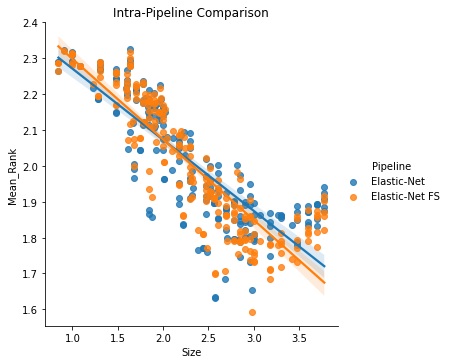

In [5]:
# Get intra pipe between just elastic and elastic FS for comparison
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['elastic', 'elasticFS'],
                                      threshold=False, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Intra-Pipeline Comparison')
plt.savefig('Figures/intra_elastic_vs_fs_no_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_elastic_vs_fs_no_threshold')
print(model.pvalues)
model.summary()

### Then a power-law thresholded version, still intra pipe

0 -27
Smallest size: 7.0
Largest size: 1500.0
0 -25
Smallest size: 7.0
Largest size: 2000.0
Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     9.002866e-01
Size                             5.412990e-134
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     744.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          1.15e-132
Time:                        10:06:52   Log-Likelihood:                 424.54
No. Observations:                 386   AIC:                            -843.1
Df Residuals:                     383   BIC:                            -831.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.6112      0.016    161.415      0.000       2.579       2.643
C(Pipeline)[T.Elastic-Net FS]    -0.0010      0.008     -0.125      0.900      -0.017       0.015
Size                             -0.2708      0.007    -38.576      0.000      -0.285      -0.257
==============================================================================
Omnibus:                       40.403   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.583
Skew:                          -0.813   Prob(JB):                     1.04e-11
Kurtosis:                       3.708   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

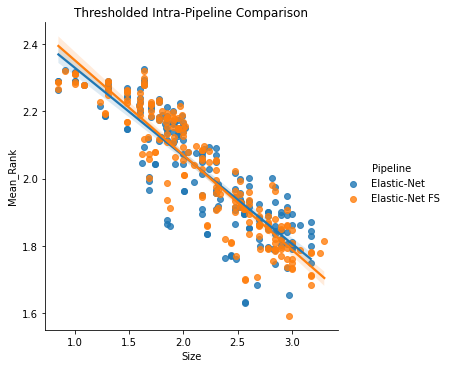

In [6]:
# Get intra pipe between just elastic and elastic FS for comparison
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['elastic', 'elasticFS'],
                                      threshold=True, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Thresholded Intra-Pipeline Comparison')
plt.savefig('Figures/intra_elastic_vs_fs_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_elastic_vs_fs_threshold')
print(model.pvalues)
model.summary()

### Now do inter-pipe comparison

Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     7.927942e-02
Size                             1.769487e-123
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          2.65e-122
Time:                        10:06:53   Log-Likelihood:                 415.29
No. Observations:                 438   AIC:                            -824.6
Df Residuals:                     435   BIC:                            -812.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7884      0.016    175.557      0.000       2.757       2.820
C(Pipeline)[T.Elastic-Net FS]     0.0158      0.009      1.759      0.079      -0.002       0.033
Size                             -0.2115      0.006    -33.731      0.000      -0.224      -0.199
==============================================================================
Omnibus:                       17.759   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.059
Skew:                          -0.461   Prob(JB):                     7.27e-05
Kurtosis:                       3.441   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

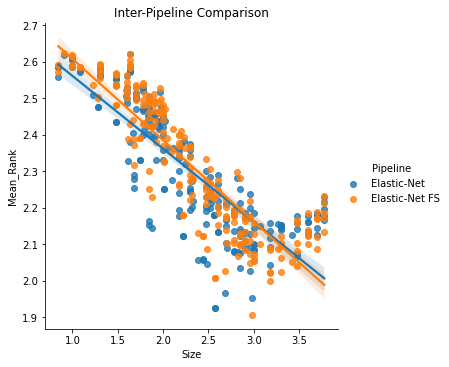

In [7]:
# Get df
inter_pipe_df = get_inter_pipe_df(results,
                                  models=['elastic', 'elasticFS'],
                                  log=True,
                                  **static)

# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=inter_pipe_df)
plt.title('Inter-Pipeline Comparison')
plt.savefig('Figures/inter_elastic_vs_fs.png', dpi=200, bbox_inches='tight')

# Stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=inter_pipe_df).fit()
save_stats_summary(model, 'inter_elastic_vs_fs')
print(model.pvalues)
model.summary()

### Repeat with LGBM now

Intercept                  0.000000e+00
C(Pipeline)[T.LGBM FS]     4.966967e-01
Size                      7.268392e-175
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1137.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          1.66e-173
Time:                        10:06:54   Log-Likelihood:                 548.67
No. Observations:                 438   AIC:                            -1091.
Df Residuals:                     435   BIC:                            -1079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.5215      0.012    215.270      0.000       2.499       2.545
C(Pipeline)[T.LGBM FS]    -0.0045      0.007     -0.680      0.497      -0.018       0.009
Size                      -0.2205      0.005    -47.685      0.000      -0.230      -0.211
==============================================================================
Omnibus:                        8.192   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.433
Skew:                          -0.223   Prob(JB):                      0.00895
Kurtosis:                       3.564   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

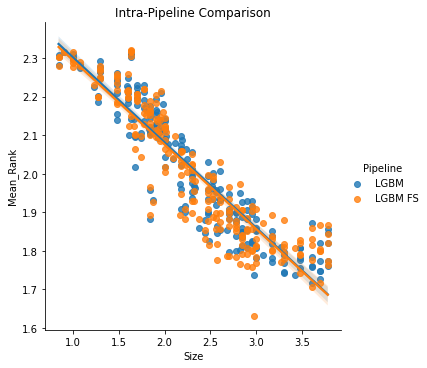

In [8]:
# Get intra pipe between
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['lgbm', 'lgbmFS'],
                                      threshold=False, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Intra-Pipeline Comparison')
plt.savefig('Figures/intra_lgbm_vs_fs_no_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_lgbm_vs_fs_no_threshold')
print(model.pvalues)
model.summary()

### Power-law thresholded version

0 -16
Smallest size: 7.0
Largest size: 3000.0
0 -5
Smallest size: 7.0
Largest size: 5000.0
Intercept                  0.000000e+00
C(Pipeline)[T.LGBM FS]     9.404495e-01
Size                      2.026956e-171
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1158.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          2.62e-170
Time:                        10:06:55   Log-Likelihood:                 541.70
No. Observations:                 417   AIC:                            -1077.
Df Residuals:                     414   BIC:                            -1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.5492      0.012    215.718      0.000       2.526       2.572
C(Pipeline)[T.LGBM FS]    -0.0005      0.007     -0.075      0.940      -0.013       0.012
Size                      -0.2357      0.005    -48.048      0.000      -0.245      -0.226
==============================================================================
Omnibus:                       13.175   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.227
Skew:                          -0.315   Prob(JB):                     0.000300
Kurtosis:                       3.733   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

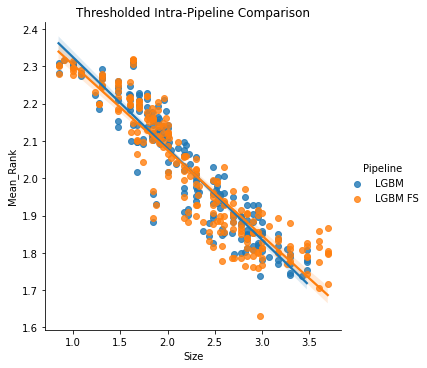

In [9]:
# Get intra pipe
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['lgbm', 'lgbmFS'],
                                      threshold=True, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Thresholded Intra-Pipeline Comparison')
plt.savefig('Figures/intra_lgbm_vs_fs_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_lgbm_vs_fs_threshold')
print(model.pvalues)
model.summary()

### Inter-Pipeline

Intercept                  0.000000e+00
C(Pipeline)[T.LGBM FS]     6.965890e-02
Size                      8.813347e-175
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1138.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          1.57e-173
Time:                        10:06:56   Log-Likelihood:                 548.54
No. Observations:                 438   AIC:                            -1091.
Df Residuals:                     435   BIC:                            -1079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.8252      0.012    241.125      0.000       2.802       2.848
C(Pipeline)[T.LGBM FS]    -0.0121      0.007     -1.819      0.070      -0.025       0.001
Size                      -0.2204      0.005    -47.660      0.000      -0.230      -0.211
==============================================================================
Omnibus:                        8.966   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.511
Skew:                          -0.235   Prob(JB):                      0.00522
Kurtosis:                       3.596   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

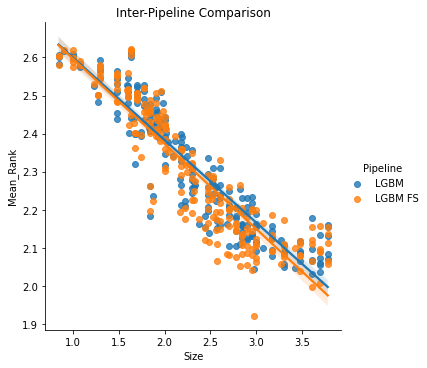

In [10]:
# Get df
inter_pipe_df = get_inter_pipe_df(results,
                                  models=['lgbm', 'lgbmFS'],
                                  log=True,
                                  **static)

# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=inter_pipe_df)
plt.title('Inter-Pipeline Comparison')
plt.savefig('Figures/inter_lgbm_vs_fs.png', dpi=200, bbox_inches='tight')

# Stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=inter_pipe_df).fit()
save_stats_summary(model, 'inter_lgbm_vs_fs')
print(model.pvalues)
model.summary()